**We pulled down ~20,000 records from both TMDb and IMDb, the code and data for which can be found here:** https://github.com/All-Star-Vipers/CS109B-Final-Project/tree/master/Milestone%201

# Libraries and Helper Functions / Objects

In [22]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import sleep
from ast import literal_eval
from imdb import IMDb

In [44]:
# json object of tmbd genre ids
# set([10752, 80, 10402, 35, 36, 37, 10769, 12, 10770, 878, 16, 27, 18, 9648, 14, 99, 53, 28, 10749, 10751])
genre_ids= {
  "genres": [
    {
      "id": 28,
      "name": "Action"
    },
    {
      "id": 12,
      "name": "Adventure"
    },
    {
      "id": 16,
      "name": "Animation"
    },
    {
      "id": 35,
      "name": "Comedy"
    },
    {
      "id": 80,
      "name": "Crime"
    },
    {
      "id": 99,
      "name": "Documentary"
    },
    {
      "id": 18,
      "name": "Drama"
    },
    {
      "id": 10751,
      "name": "Family"
    },
    {
      "id": 14,
      "name": "Fantasy"
    },
    {
      "id": 36,
      "name": "History"
    },
    {
      "id": 27,
      "name": "Horror"
    },
    {
      "id": 10402,
      "name": "Music"
    },
    {
      "id": 9648,
      "name": "Mystery"
    },
    {
      "id": 10749,
      "name": "Romance"
    },
    {
      "id": 878,
      "name": "Science Fiction"
    },
    {
      "id": 10770,
      "name": "TV Movie"
    },
    {
      "id": 53,
      "name": "Thriller"
    },
    {
      "id": 10752,
      "name": "War"
    },
    {
      "id": 37,
      "name": "Western"
    },
    {
      "id": 10769,
      "name": "Foreign"
    },
  ]
}

# Favorite Movie Information

### Get Favorite Movie ID

In [3]:
api_key = '9ec0c2e7850f575e7dcd37c195e45b69'
favorite_movie = 'Gladiator'
api_url = 'https://api.themoviedb.org/3/search/movie?api_key={0}&query={1}&page=1'.format(api_key, favorite_movie)
response = requests.get(api_url)
movies = json.loads(response.text)
print json.dumps(movies['results'][0], indent=4, sort_keys=True)

{
    "adult": false, 
    "backdrop_path": "/5vZw7ltCKI0JiOYTtRxaIC3DX0e.jpg", 
    "genre_ids": [
        28, 
        18, 
        12
    ], 
    "id": 98, 
    "original_language": "en", 
    "original_title": "Gladiator", 
    "overview": "General Maximus' success in battle earns the favour of the Roman Empire's elderly Emperor at the expense of the Emperor's son. In a fit of jealous rage the son slays his father before turning his anger towards Maximus. Now reduced to a slave, and his family dead, Maximus must fight as a gladiator to gain his freedom \u2013 and his revenge.", 
    "popularity": 8.000926, 
    "poster_path": "/6WBIzCgmDCYrqh64yDREGeDk9d3.jpg", 
    "release_date": "2000-05-01", 
    "title": "Gladiator", 
    "video": false, 
    "vote_average": 7.8, 
    "vote_count": 4291
}


### Get Favorite Movie Genre and Poster Path

In [4]:
favorite_movie_id = 98
api_url = 'https://api.themoviedb.org/3/movie/{1}?api_key={0}'.format(api_key, favorite_movie_id)
response = requests.get(api_url)
tmdb_data = json.loads(response.text)
print('Genres: ' + str(tmdb_data['genres']))
print('Poster Path: ' + str(tmdb_data['poster_path']))

Genres: [{u'id': 28, u'name': u'Action'}, {u'id': 18, u'name': u'Drama'}, {u'id': 12, u'name': u'Adventure'}]
Poster Path: /6WBIzCgmDCYrqh64yDREGeDk9d3.jpg


### Genre from TMDB and IMDB

In [5]:
print("TMDB Genres:")
for genre in tmdb_data['genres']:
    print(genre['name'])

# get IMDB data
ia = IMDb()
imdb_data = ia.get_movie(str(tmdb_data['imdb_id'])[2:])
print("\nIMDB Genres:")
for genre in imdb_data['genres']:
    print(genre)

TMDB Genres:
Action
Drama
Adventure

IMDB Genres:
Action
Adventure
Drama


# Popular Movies from TMDB

### Get Popular Movies Data

In [6]:
# loops through each page of popular movies in TMDB and adds it to a dataframe object
df = []
total_pages = range(1,976+1)
for page in total_pages:
    current_page = requests.get('https://api.themoviedb.org/3/movie/popular?api_key=ed5609930331aab76658f32439c5e5e5&language=en-US&page='+str(page))
    sleep(0.25)
    data = json.loads(current_page.text)
    try:
        for element in data['results']:
            df.append(element)
    except:
        continue
df = pd.DataFrame(df)
df.head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/tyler/anaconda2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/Users/tyler/anaconda2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/Users/tyler/anaconda2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/Users/tyler/anaconda2/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/Users/tyler/anaconda2/lib/python2.7/inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/Users/tyler/anaconda2/lib/python2.7/inspect.py", line 454, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File

IndexError: string index out of range

In [ ]:
# get shape of dataframe
df.shape

In [ ]:
# put columns that cannot be saved directly to csv into list
columns_to_convert = ['overview', 'title', 'original_title']
for column in columns_to_convert:
    df[column] = df[column].apply(lambda x: [x])

### View Top 10 Movies and Genres

In [128]:
df = pd.read_csv('popular_movie_data_tmdb.csv')
df_top_10 = df.iloc[:10]

In [129]:
genre_id_map = {genre['id']:genre['name'] for genre in genre_ids['genres']}
for i in range(10):
    genres = [genre_id_map[genre_id] for genre_id in literal_eval(df_top_10.iloc[i]['genre_ids'])]
    print("{0}: {1}".format(literal_eval(df_top_10.iloc[i]['title'])[0], genres))

Beauty and the Beast: ['Fantasy', 'Music', 'Romance']
Logan: ['Action', 'Drama', 'Science Fiction']
Sing: ['Animation', 'Comedy', 'Drama', 'Family', 'Music']
Kong: Skull Island: ['Science Fiction', 'Action', 'Adventure', 'Fantasy']
Jurassic World: ['Action', 'Adventure', 'Science Fiction', 'Thriller']
Ghost in the Shell: ['Action', 'Drama', 'Science Fiction']
Fantastic Beasts and Where to Find Them: ['Adventure', 'Action', 'Fantasy']
The Boss Baby: ['Animation', 'Comedy', 'Family']
Interstellar: ['Adventure', 'Drama', 'Science Fiction']
Finding Dory: ['Adventure', 'Animation', 'Comedy', 'Family']


# Challenges for Prediction

A few challenges for prediction include:
<ol>
<li> Working with different genre entries from IMDb and TMDb. See below.
<li> Movies change over time. Budget in particular could be problematic. How do we factor this into our predictions? One way would be to bin movies into time periods (for example 1990-1995, 1995-2000, etc.). Another way would be to use a moving average of movie budgets at each point in time, and then compare each movie to the average budget at the point in time of its production.
<li> Working with actor data will be interesting. There are probably interesting ways to use that data including creating a network of actors based on who has participated together, and then we can use the graph characteristics combined with the movie genres of the actors' movies to predict the genre of a different movie.
</ol>

# Movie Genre Pairs

### Generate movie genre pairs

In [130]:
# get list of genre ids
col_ids = [genre['id'] for genre in genre_ids['genres']]

In [131]:
# encode genre matrix if movie contains genre
def movie_id_machine(genre_ids, columns):
    new_row = []
    for column in columns:
        if column in genre_ids:
            new_row.append(1)
        else:
            new_row.append(0)
    return new_row

In [133]:
# encode genre
df['genre_encoding'] = df['genre_ids'].apply(lambda ids: movie_id_machine(literal_eval(ids), col_ids))

In [134]:
# create list of genre names
col_names = [genre['name'] for genre in genre_ids['genres']]

# create separate dataframe with genre encoding
df_genres = pd.DataFrame(df['genre_encoding'].tolist(), columns = col_names)

# add TMDB id to genre encoding dataframe
df_genres['id'] = df['id']
df_genres.shape

(19262, 21)

In [135]:
df_genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Foreign,id
0,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,321612
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,263115
2,0,0,1,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,335797
3,1,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,293167
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,135397


### Genre Pairs Visualization

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1491394078709' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;cs&#47;cs109b_genre_raw_total&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='cs109b_genre_raw_total&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;cs&#47;cs109b_genre_raw_total&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1491394078709');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='869px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Additional Visualization and EDA

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1491392940635' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;cs&#47;cs109b_genre_proportion&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='cs109b_genre_proportion&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;cs&#47;cs109b_genre_proportion&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1491392940635');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='869px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [47]:
genres_list = [item for i in range(df.shape[0]) for item in json.loads(df['genre_ids'][i])]
print set(genres_list)
genre_to_count = {genre_id_map[genre]:genres_list.count(genre) for genre in genres_list}
genre_to_count

set([10752, 80, 10402, 35, 36, 37, 10769, 12, 10770, 878, 16, 27, 18, 9648, 14, 99, 53, 28, 10749, 10751])


{'Action': 3943,
 'Adventure': 2364,
 'Animation': 1351,
 'Comedy': 5859,
 'Crime': 2194,
 'Documentary': 587,
 'Drama': 8867,
 'Family': 1677,
 'Fantasy': 1456,
 'Foreign': 286,
 'History': 687,
 'Horror': 2240,
 'Music': 547,
 'Mystery': 1222,
 'Romance': 3116,
 'Science Fiction': 1753,
 'TV Movie': 297,
 'Thriller': 4344,
 'War': 580,
 'Western': 352}

In [62]:
genre_frequencies = {k:float(v)/(df.shape[0]) for k,v in genre_to_count.items()}

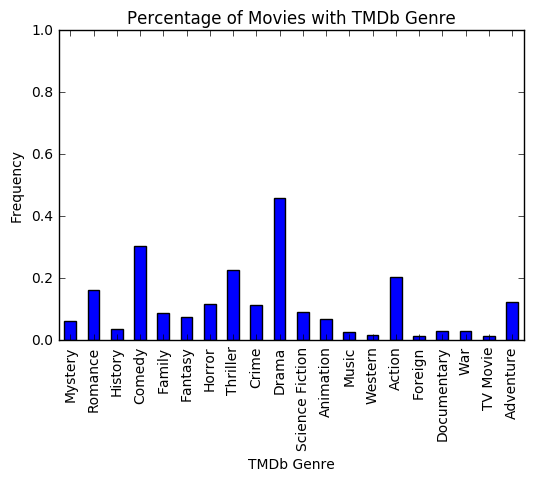

In [73]:
genre_freq_df = pd.DataFrame.from_dict(genre_frequencies, orient='index')
genre_freq_df.plot(kind='bar', title='Percentage of Movies with TMDb Genre', legend=False, ylim=(0.0,1.0))
plt.xlabel('TMDb Genre')
plt.ylabel('Frequency')
plt.show()

In [23]:
## Plot various differentiating characteristics of genres
tmdb_det = pd.read_csv("detailed_movie_data_tmdb.csv")
tmdb_pop = pd.read_csv("popular_movie_data_tmdb.csv")
tmdb_gen = pd.read_csv("tmdb_genre_encoding.csv")

# Create a dataframe for calculations and plotting
tmdb_plot = tmdb_gen.merge(tmdb_det.loc[:,['id','revenue','popularity', 'budget']], on = 'id')

# Drop no budget/no revenue films
tmdb_plot = tmdb_plot[(tmdb_plot.revenue != 0) & (tmdb_plot.budget != 0)]

# Create an empty dataframe to store information about average revenue, popularity and budget
genre_plot = pd.DataFrame(index = tmdb_gen.columns.drop('id'), 
                          columns = ['Median Budget', 'Median Revenue','Median Popularity',
                                     'Average Budget', 'Average Revenue','Average Popularity'])

# Take the median of each statistic by genre 
for genre in tmdb_gen.columns.drop('id'):
    genre_plot.loc[genre, 'Median Budget'] = np.median(tmdb_plot.loc[tmdb_plot[genre]==1, 'budget'])
    genre_plot.loc[genre, 'Median Revenue'] = np.median(tmdb_plot.loc[tmdb_plot[genre]==1, 'revenue'])
    genre_plot.loc[genre, 'Median Popularity'] = np.median(tmdb_plot.loc[tmdb_plot[genre]==1, 'popularity'])
    genre_plot.loc[genre, 'Average Budget'] = np.mean(tmdb_plot.loc[tmdb_plot[genre]==1, 'budget'])
    genre_plot.loc[genre, 'Average Revenue'] = np.mean(tmdb_plot.loc[tmdb_plot[genre]==1, 'revenue'])
    genre_plot.loc[genre, 'Average Popularity'] = np.mean(tmdb_plot.loc[tmdb_plot[genre]==1, 'popularity'])

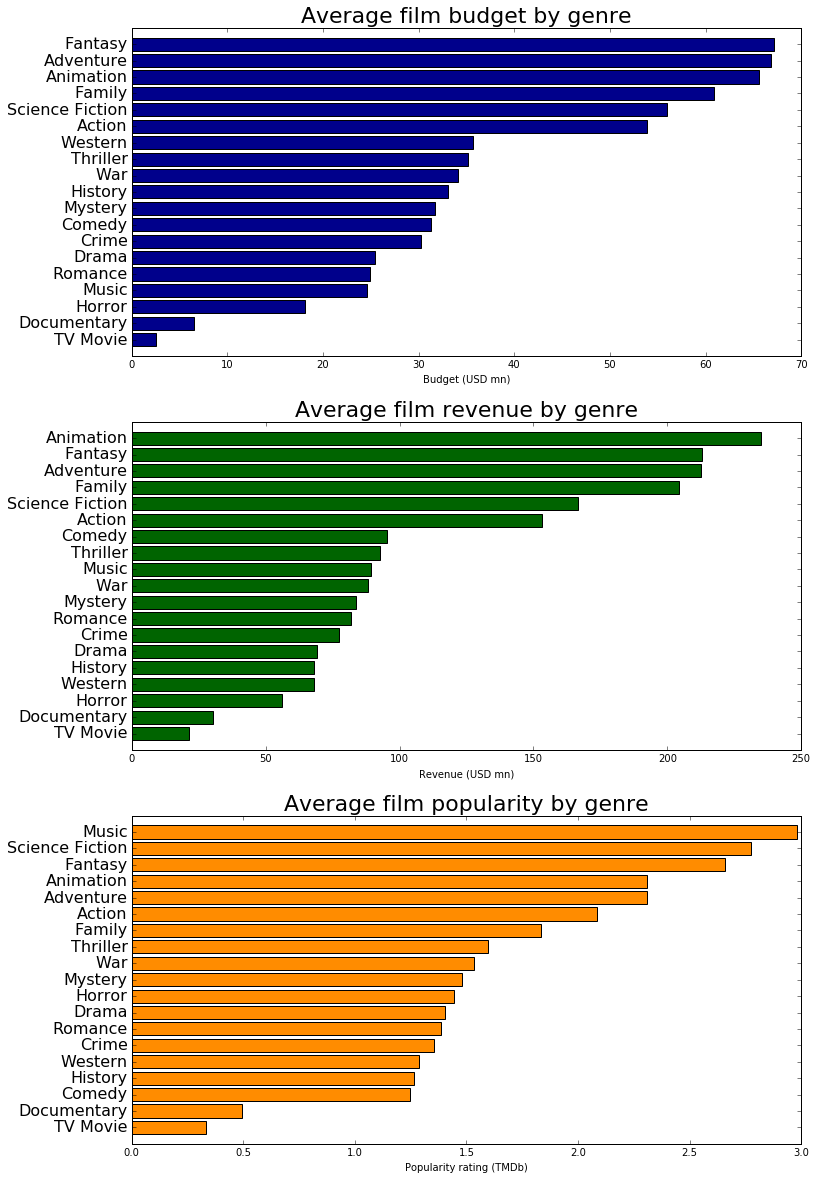

In [67]:
# Plot film characteristics by genre

fig, ax = plt.subplots(3, 1, figsize = (12, 20))

y_pos = np.arange(len(genre_plot.index))

ax[0].barh(y_pos, genre_plot['Average Budget'].sort_values()/1e6,  align = "center", color = "darkblue")
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(genre_plot.sort_values('Average Budget').index, fontsize = 16)
ax[0].set_ylim(-1, len(genre_plot.index))
ax[0].set_title("Average film budget by genre", fontsize = 22)
ax[0].set_xlabel("Budget (USD mn)")

ax[1].barh(y_pos, genre_plot['Average Revenue'].sort_values()/1e6, align = "center", color = "darkgreen")
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(genre_plot.sort_values('Average Revenue').index, fontsize = 16)
ax[1].set_ylim(-1, len(genre_plot.index))
ax[1].set_title("Average film revenue by genre", fontsize = 22)
ax[1].set_xlabel("Revenue (USD mn)")

ax[2].barh(y_pos, genre_plot['Average Popularity'].sort_values(), align = "center", color = "darkorange")
ax[2].set_yticks(y_pos)
ax[2].set_yticklabels(genre_plot.sort_values('Average Popularity').index, fontsize = 16)
ax[2].set_ylim(-1, len(genre_plot.index))
ax[2].set_title("Average film popularity by genre", fontsize = 22)
ax[2].set_xlabel("Popularity rating (TMDb)")

plt.show();

In [78]:
imdb_detailed = pd.read_csv('detailed_movie_data_imdb.csv')

In [79]:
imdb_detailed.shape

(1862, 84)

In [86]:
imdb_detailed['genres'].head()

0     [u'Family', u'Fantasy', u'Musical', u'Romance']
1       [u'Action', u'Drama', u'Sci-Fi', u'Thriller']
2      [u'Animation', u'Comedy', u'Family', u'Music']
3    [u'Action', u'Adventure', u'Fantasy', u'Sci-Fi']
4                [u'Action', u'Adventure', u'Sci-Fi']
Name: genres, dtype: object

In [119]:
imdb_genres_list = []
for i in range(imdb_detailed.shape[0]):
    # have this in here because the file is messed up right now, so nans
    try:
        x = eval(imdb_detailed['genres'][i])
    except:
        pass
    imdb_genres_list.extend(x)
# imdb_genres_list = [item for i in range(imdb_detailed.shape[0]) for item in eval(imdb_detailed['genres'][i])]
print len(set(imdb_genres_list)), set(imdb_genres_list)

25 set([u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', u'Film-Noir', u'Adventure', u'News', u'Thriller', u'Western', u'Mystery', u'Short', u'Drama', u'Action', u'Documentary', u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography'])


In [123]:
set(imdb_genres_list).intersection(set(genre_to_count.keys())) # intersection of genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Thriller',
 'War',
 'Western'}

We can see that there is a significant intersection in the genres between IMDb and TMDb. One potential way of dealing with the slightly different genres is to use only the common genres, especially as many movies are listed under multiple genres.

In [127]:
set(imdb_genres_list).symmetric_difference(set(genre_to_count.keys())) # what's not in intesection?

{u'Adult',
 u'Biography',
 u'Film-Noir',
 'Foreign',
 u'Musical',
 u'News',
 u'Sci-Fi',
 'Science Fiction',
 u'Short',
 u'Sport',
 'TV Movie'}

We can also see that some synonymous genres have slightly different names between IMDb and TMDb. For example "Sci-Fi" versus "Science Fiction". We can simply map those to the same genre in our analysis.

# Question List

1. Is there a relationship between cast size and genre?
2. Is there a relationship between overview text and genre?